In [1]:
import os
path = os.getcwd()

if path[1:5] == 'Home':
    %run /Home/siv30/wad005/master/GRB/src/harvest_matlab_data.ipynb
    %run /Home/siv30/wad005/master/GRB/src/background_rates.ipynb
    %run /Home/siv30/wad005/master/GRB/src/dau_det_distribution.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/harvest_matlab_data.ipynb
    %run /Users/andreas/phys/master/GRB/src/background_rates.ipynb
    %run /Users/andreas/phys/master/GRB/src/dau_det_distribution.ipynb


all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!
safety_time.ipynb loaded successfully!

all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!
convert_erg.ipynb loaded successfully!

all UiB paths loaded
read_matlab_file.ipynb loaded successfully!

all UiB paths loaded
read_mat

In [2]:
df_harvest = harvest_data(fn='2018_12_22_20_11_36',T0='2018-12-22T20:11:36.576')

dau/det starting from index 1
tus array given in seconds
45400
safety time:  0.489 % removed
tus given in seconds


In [3]:
df_harvest

,year,month,day,hour,minute,second,erg,dau,det,datetime,tus,adr,keV,st,dt,flag
0,2018,12,22,20,8,40.938288,21,3,3,2018-12-22 20:08:40.938288194,-175.637712,9,468.909186,0.000000,0.000,False
1,2018,12,22,20,8,40.938759,85,1,1,2018-12-22 20:08:40.938758722,-175.637241,1,825.915195,2.303661,0.000,False
2,2018,12,22,20,8,40.938762,141,2,3,2018-12-22 20:08:40.938762361,-175.637238,6,1341.071672,7.136906,0.000,False
3,2018,12,22,20,8,40.93884,78,1,1,2018-12-22 20:08:40.938839972,-175.637160,1,759.868550,2.039474,81.250,False
4,2018,12,22,20,8,40.93884,21,1,2,2018-12-22 20:08:40.938840000,-175.637160,2,390.028007,0.000000,0.000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45173,2018,12,22,20,11,38.044684,35,4,1,2018-12-22 20:11:38.044684278,1.468684,10,415.538900,0.155389,39.167,False
45174,2018,12,22,20,11,38.045209,16,3,1,2018-12-22 20:11:38.045208611,1.469209,7,344.125122,0.000000,2672.167,False
45175,2018,12,22,20,11,38.045362,184,1,1,2018-12-22 20:11:38.045361833,1.469362,1,1811.896290,7.330114,1348.111,False
45176,2018,12,22,20,11,38.045496,1863,1,1,2018-12-22 20:11:38.045496000,1.469496,1,33295.857875,26.318343,134.167,False


tus array OK ...


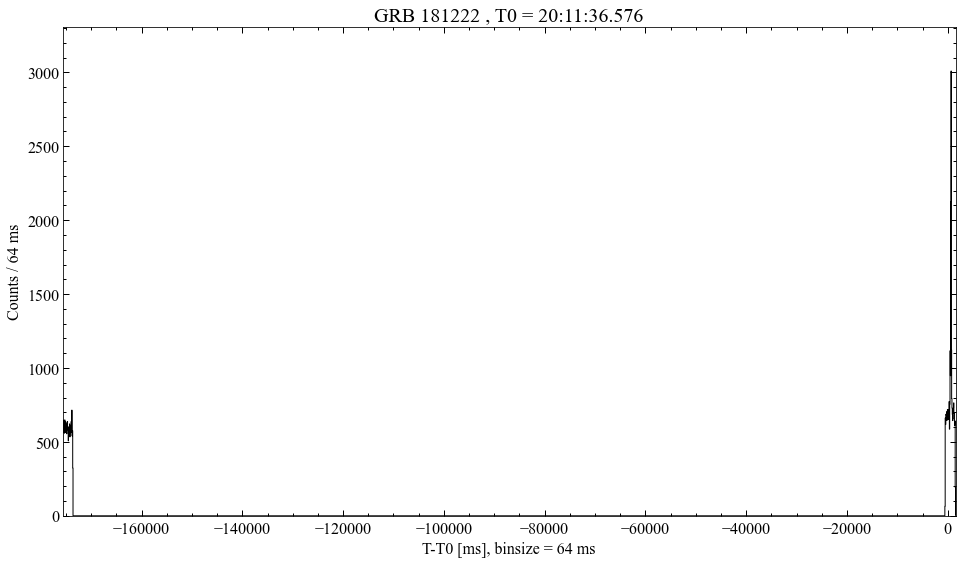

In [5]:
plot_HED(tus_arr=df_harvest['tus'].to_numpy()*1e6,binsize=64,T0=datetime.fromisoformat('2018-12-22T20:11:36.576'))

In [7]:
cr,df_cr = get_count_rate(fn='2018_12_22_20_11_36',T0='2018-12-22T20:11:36.576',bkg_start='start',bkg_end=-172)

2018-12-22 20:11:36.576000
bkg starts and ends at:  start -172 s
dau/det starting from index 1
tus array given in seconds
45400
safety time:  0.489 % removed
tus given in seconds
background count rate:  9336.353  counts/s
returning count_rate and background df (sorted by tus (s) and st removed)


tus array OK ...


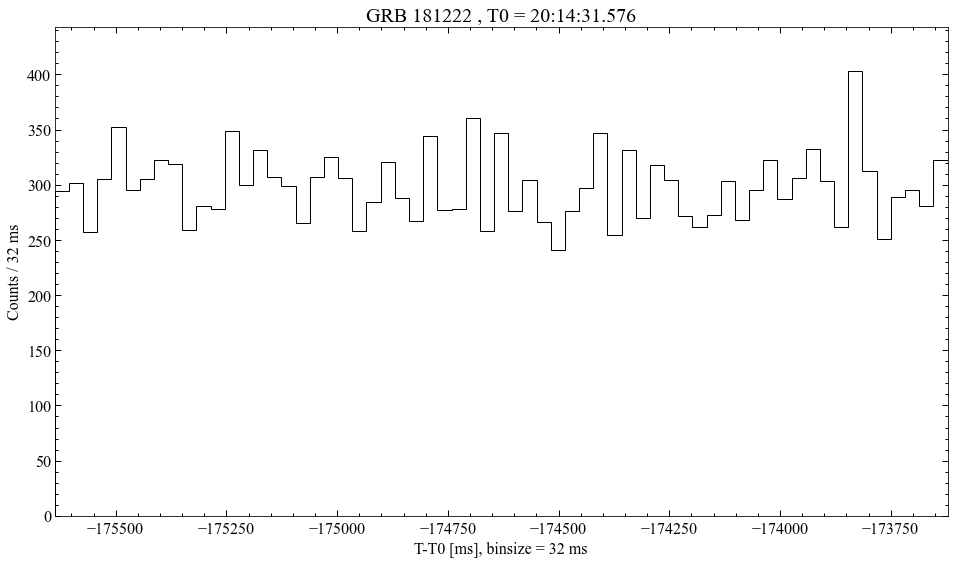

In [11]:
plot_HED(tus_arr=df_cr['tus'].to_numpy()*1e6,binsize=32,T0=datetime.fromisoformat('2018-12-22T20:11:36.576')-timedelta(seconds=-175))

In [14]:
tus = df_cr['tus'].to_numpy()
print(tus[0],tus[-1])
print(len(tus)/(tus[-1]-tus[0]))

-175.637711806 -173.62814758300001
9336.352521240198
